# Step 1: Choose Dataset


In [ ]:
pip install datasets

In [2]:
from datasets import load_dataset
dataset = load_dataset("go_emotions")

c:\Users\lv909\anaconda3\envs\python-starter\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
print(dataset.keys())

dict_keys(['train', 'validation', 'test'])


In [4]:
train_data = dataset["train"]

In [5]:
print(train_data[0])

{'text': "My favourite food is anything I didn't have to cook myself.", 'labels': [27], 'id': 'eebbqej'}


In [6]:
[train_data[i] for i in range(5)]

[{'text': "My favourite food is anything I didn't have to cook myself.",
  'labels': [27],
  'id': 'eebbqej'},
 {'text': 'Now if he does off himself, everyone will think hes having a laugh screwing with people instead of actually dead',
  'labels': [27],
  'id': 'ed00q6i'},
 {'text': 'WHY THE FUCK IS BAYLESS ISOING', 'labels': [2], 'id': 'eezlygj'},
 {'text': 'To make her feel threatened', 'labels': [14], 'id': 'ed7ypvh'},
 {'text': 'Dirty Southern Wankers', 'labels': [3], 'id': 'ed0bdzj'}]

In [7]:
label_names = dataset['train'].features['labels'].feature.names

In [8]:
import pandas as pd

df = pd.DataFrame(dataset["train"])
df['label_names'] = df['labels'].apply(lambda x: [label_names[i] for i in x])
print(df.head())

                                                text labels       id  \
0  My favourite food is anything I didn't have to...   [27]  eebbqej   
1  Now if he does off himself, everyone will thin...   [27]  ed00q6i   
2                     WHY THE FUCK IS BAYLESS ISOING    [2]  eezlygj   
3                        To make her feel threatened   [14]  ed7ypvh   
4                             Dirty Southern Wankers    [3]  ed0bdzj   

   label_names  
0    [neutral]  
1    [neutral]  
2      [anger]  
3       [fear]  
4  [annoyance]  


In [10]:
df.head()

,text,labels,id,label_names
0,My favourite food is anything I didn't have to...,[27],eebbqej,[neutral]
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,[neutral]
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,[anger]
3,To make her feel threatened,[14],ed7ypvh,[fear]
4,Dirty Southern Wankers,[3],ed0bdzj,[annoyance]


In [11]:
df.isnull().sum()

text           0
labels         0
id             0
label_names    0
dtype: int64

In [ ]:
pip install matplotlib seaborn

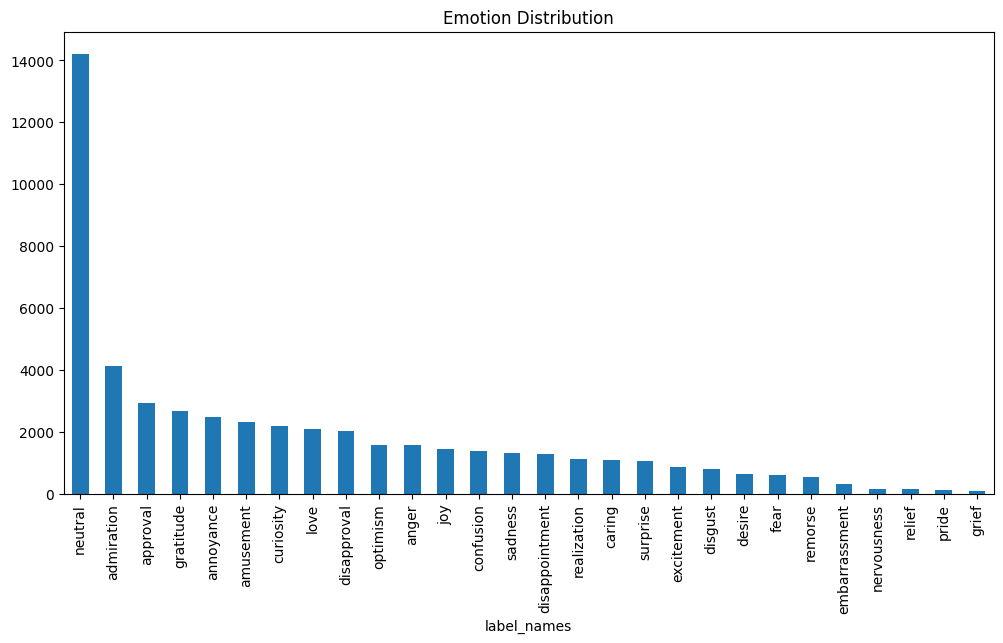

In [15]:
import matplotlib.pyplot as plt

emotion_counts = df['label_names'].explode().value_counts()
emotion_counts.plot(kind='bar', figsize=(12, 6), title='Emotion Distribution')
plt.show()

In [16]:
df.size

173640

In [17]:
df.columns

Index(['text', 'labels', 'id', 'label_names'], dtype='object')

### Extract only text and labels:

In [25]:
text = df['text']
labels = df['labels']

In [34]:
pip install scikit-learn

   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/10.7 MB 5.2 MB/s eta 0:00:02
   ---------- ----------------------------- 2.9/10.7 MB 5.4 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/10.7 MB 5.7 MB/s eta 0:00:02
   ------------------- -------------------- 5.2/10.7 MB 5.6 MB/s eta 0:00:01
   ------------------------- -------------- 6.8/10.7 MB 5.7 MB/s eta 0:00:01
   ------------------------------ --------- 8.1/10.7 MB 5.9 MB/s eta 0:00:01
   ----------------------------------- ---- 9.4/10.7 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 5.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
   - -------------------------------------- 1.3/41.2 MB 6.7 MB/s eta 0:00:06
   -- ------------------------------------- 2.6/41.2 MB 6.6 MB/s eta 0:00:06
   --- ------------

# Step 2: Preprocess Journal Text

In [36]:
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
from nltk.corpus import stopwords

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

cleaned_texts = [clean_text(t) for t in text]

# Vectorize
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(cleaned_texts)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lv909\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
cleaned_texts

['favourite food anything didnt cook',
 'everyone think hes laugh screwing people instead actually dead',
 'fuck bayless isoing',
 'make feel threatened',
 'dirty southern wankers',
 'omg peyton isnt good enough help us playoffs dumbass broncos fans circa december 2015',
 'yes heard abt f bombs thanks reply hubby anxiously wait',
 'need boards create bit space name well good',
 'damn youtube outrage drama super lucrative reddit',
 'might linked trust factor friend',
 'demographics dont know anybody 35 cable tv',
 'aww shell probably come around eventually im sure jealous name mean woman wouldnt lol',
 'hello everyone im toronto well call visit personal needed',
 'rsleeptrain might time sleep training take look try feel whats right family',
 'name fucking problem slightly better command english language',
 'shit guess accidentally bought payperview boxing match',
 'thank friend',
 'fucking coward',
 'retardation looks like',
 'maybe thats happened great white houston zoo',
 'never thoug

#  Step 3: Encode Emotion Labels

In [41]:
from sklearn.preprocessing import MultiLabelBinarizer

# labels is a list of label index arrays: [[4], [2, 6], ...]
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(labels)

In [45]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


# Step 4: Save Everything

In [46]:
import pickle
with open('X.pkl',"wb") as f:
    pickle.dump(X, f)
with open('y.pkl','wb') as f:
    pickle.dump(y, f)
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)    